In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
import seaborn as sns
import math
from scipy import stats
import scipy
import cooler
import cooltools.lib.plotting
from cooltools import insulation
import copy

import itertools

import os
import sys

# local imports 
import filters
import pore_c_utils as pcu

In [2]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.WARN)

In [3]:
assembly = pcu.loadAssembly("GRCm39_Assembly.txt")
assembly

,Chromosome,Total length,GenBank accession,RefSeq accession,chromEnd,chromStart
0,1,195154279,CM000994.3,NC_000067.7,195154279,0
1,2,181755017,CM000995.3,NC_000068.8,376909296,195154279
2,3,159745316,CM000996.3,NC_000069.7,536654612,376909296
3,4,156860686,CM000997.3,NC_000070.7,693515298,536654612
4,5,151758149,CM000998.3,NC_000071.7,845273447,693515298
5,6,149588044,CM000999.3,NC_000072.7,994861491,845273447
6,7,144995196,CM001000.3,NC_000073.7,1139856687,994861491
7,8,130127694,CM001001.3,NC_000074.7,1269984381,1139856687
8,9,124359700,CM001002.3,NC_000075.7,1394344081,1269984381
9,10,130530862,CM001003.3,NC_000076.7,1524874943,1394344081


In [4]:
dirpath = "/nfs/turbo/umms-indikar/shared/tools/Pore-C-Snakemake/results_ES5to12/matrix/"

resolution = 1000000

mcools = {
    
}

for file in os.listdir(dirpath):
    if file.endswith('mcool'):
        print(f"{file=}")
        runId = file.split("_")[1]
        fullpath = f"{dirpath}{file}"
        mcools[runId] = cooler.Cooler(f'{fullpath}::resolutions/{resolution}') 

mcools.keys()

file='NlaIII_run06_GRCm39_unphased.matrix.mcool'
file='NlaIII_run01_GRCm39_unphased.matrix.mcool'
file='NlaIII_run03_GRCm39_unphased.matrix.mcool'
file='NlaIII_run04_GRCm39_unphased.matrix.mcool'
file='NlaIII_run02_GRCm39_unphased.matrix.mcool'
file='NlaIII_run07_GRCm39_unphased.matrix.mcool'
file='NlaIII_run05_GRCm39_unphased.matrix.mcool'


dict_keys(['run06', 'run01', 'run03', 'run04', 'run02', 'run07', 'run05'])

In [5]:
# ?cooler.balance_cooler

# KR Balancing

In [6]:
# MAX_ITER = 500
# TOLERANCE = 1e-06
# bias = {}

# for runId, clr in mcools.items():
#     print(f"{runId=}")
#     runCool = copy.deepcopy(clr)
#     weights, stats = cooler.balance_cooler(runCool, 
#                                            rescale_marginals=True, 
#                                            store=True, 
#                                            tol=TOLERANCE,
#                                            max_iters=MAX_ITER)
#     print(stats)
    
# print('done')

# Balancing Another Way (slow)

In [7]:
chromosome = 'NC_000068.8'

res = []

for runId, clr in mcools.items():
    print(f"{runId=}")
    A = clr.matrix(balance=True).fetch(chromosome)
    B, _ = scipy.linalg.matrix_balance(A, permute=False)
    res.append(B)
    
    
print('done')

runId='run06'
runId='run01'
runId='run03'
runId='run04'
runId='run02'
runId='run07'
runId='run05'
done


# create pseudo-bulk data for chrom 2


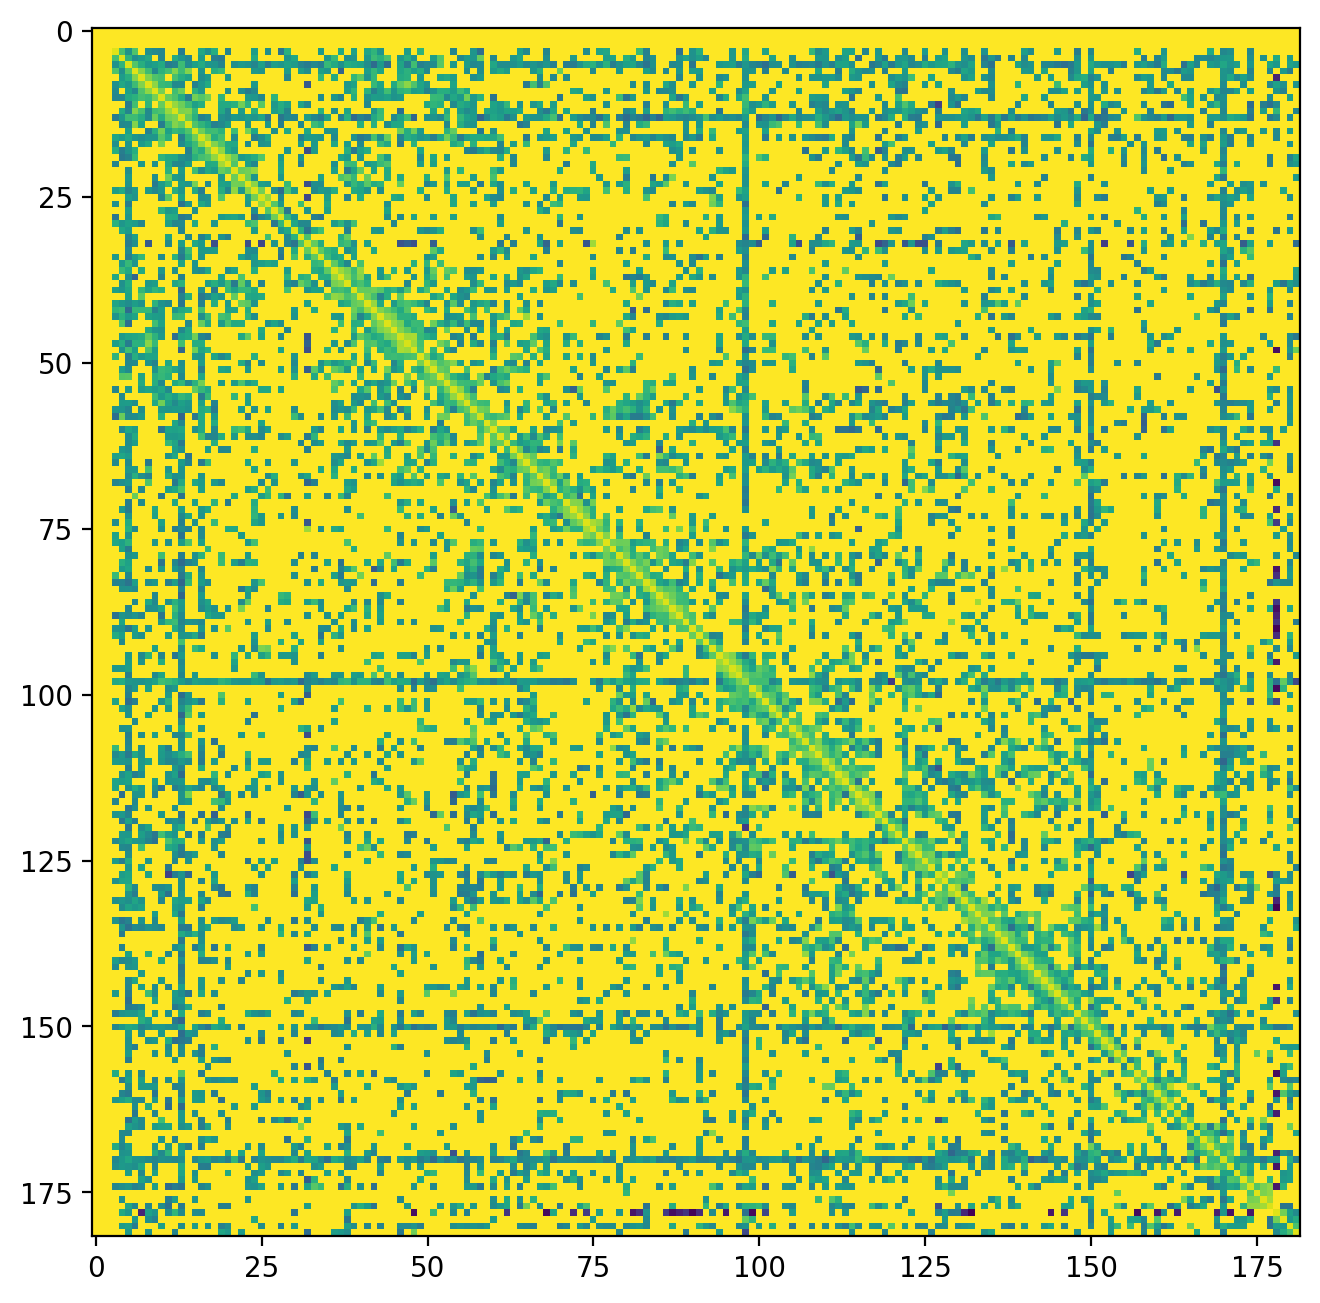

In [8]:
A = np.zeros(res[0].shape)

for i in res:
    A = A + np.divide(i, len(res))
    
Alog = np.ma.log(A).filled(0) # log scale

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 8, 8
plt.imshow(Alog, cmap='viridis')

In [9]:
# chromosome = 'NC_000068.8'
    
# matrices = []

# for runId, clr in mcools.items():
#     A = clr.matrix(balance=True).fetch(chromosome)
#     print(f"{runId=} {A.shape=}")
#     matrices.append(A)
    
# print('done')

In [10]:
# A = np.zeros(matrices[0].shape)

# for i in matrices:
#     A = A + np.divide(i, len(matrices))
    
# Alog = np.ma.log(A).filled(0) # log scale

# plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = 8, 8
# plt.imshow(Alog, cmap='viridis')

In [11]:
len(res)

7

run06: rank=179
run01: rank=179
run03: rank=179
run04: rank=179
run02: rank=179
run07: rank=179
run05: rank=179


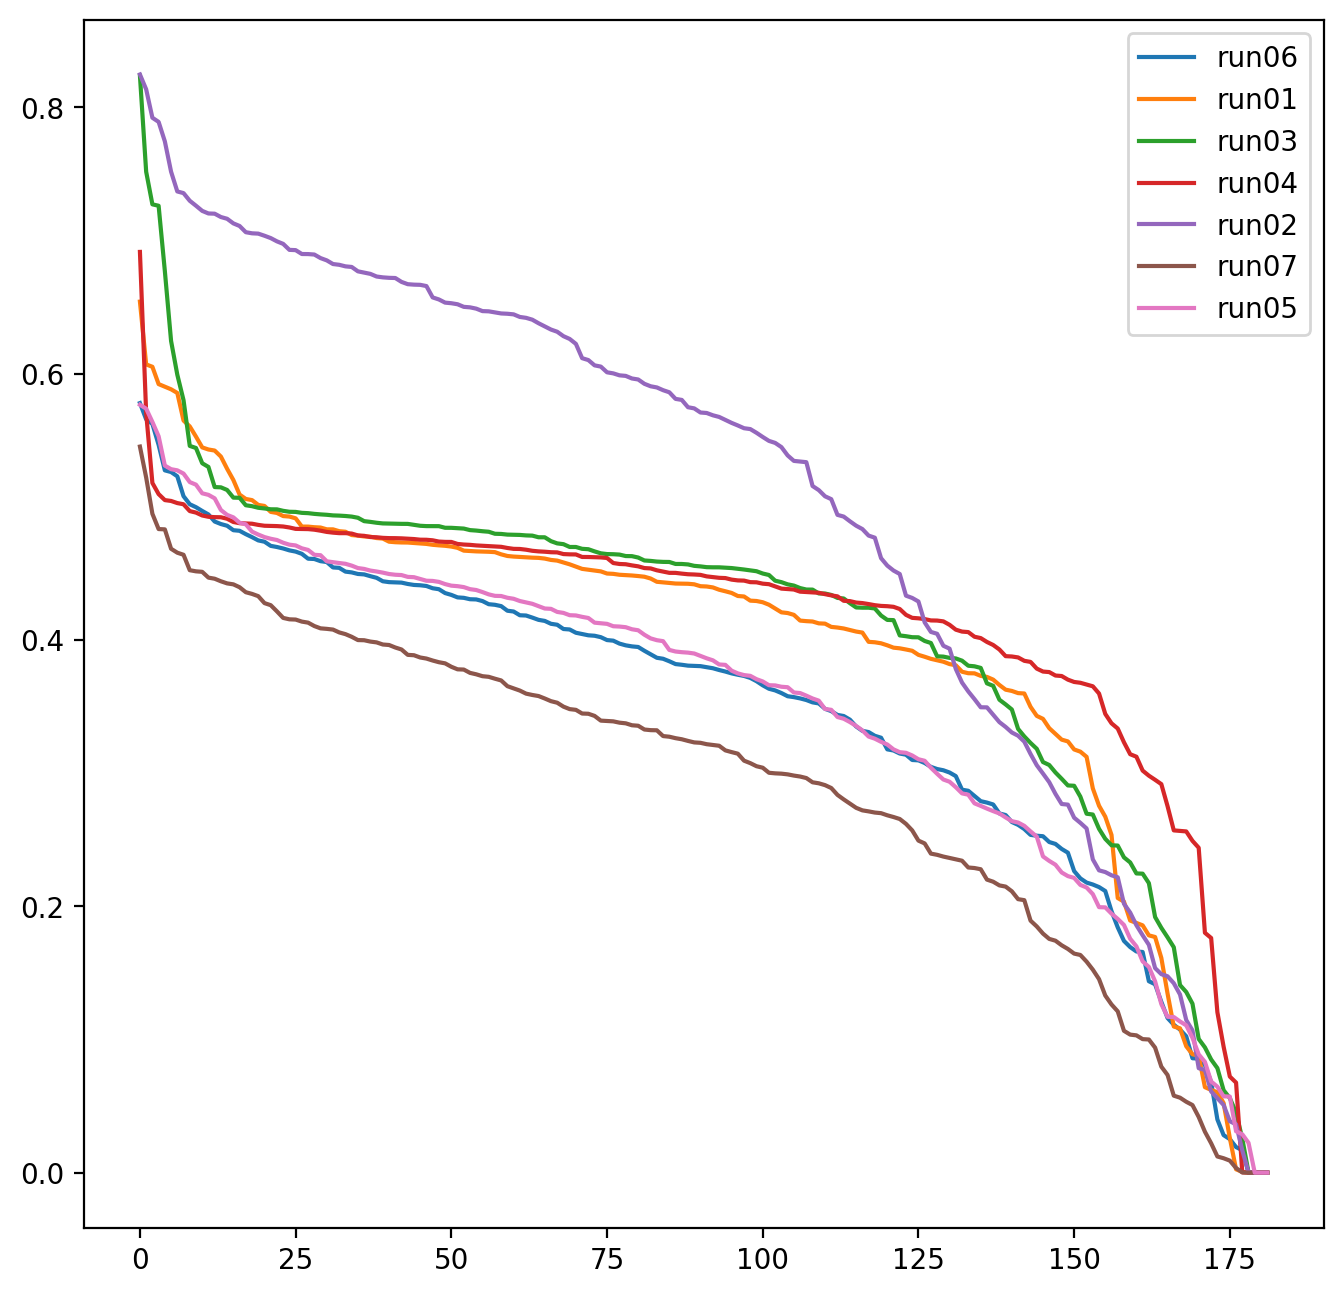

In [14]:


for i, A in  enumerate(res):
    
    u, s, vh = np.linalg.svd(A)
    label = list(mcools.keys())[i]
    
    rank = np.linalg.matrix_rank(A)
    print(f"{label}: {rank=}")
    
    svd_ind = list(range(len(s)))
    plt.plot(svd_ind, s, label=label)
    
    
plt.legend()
    
    

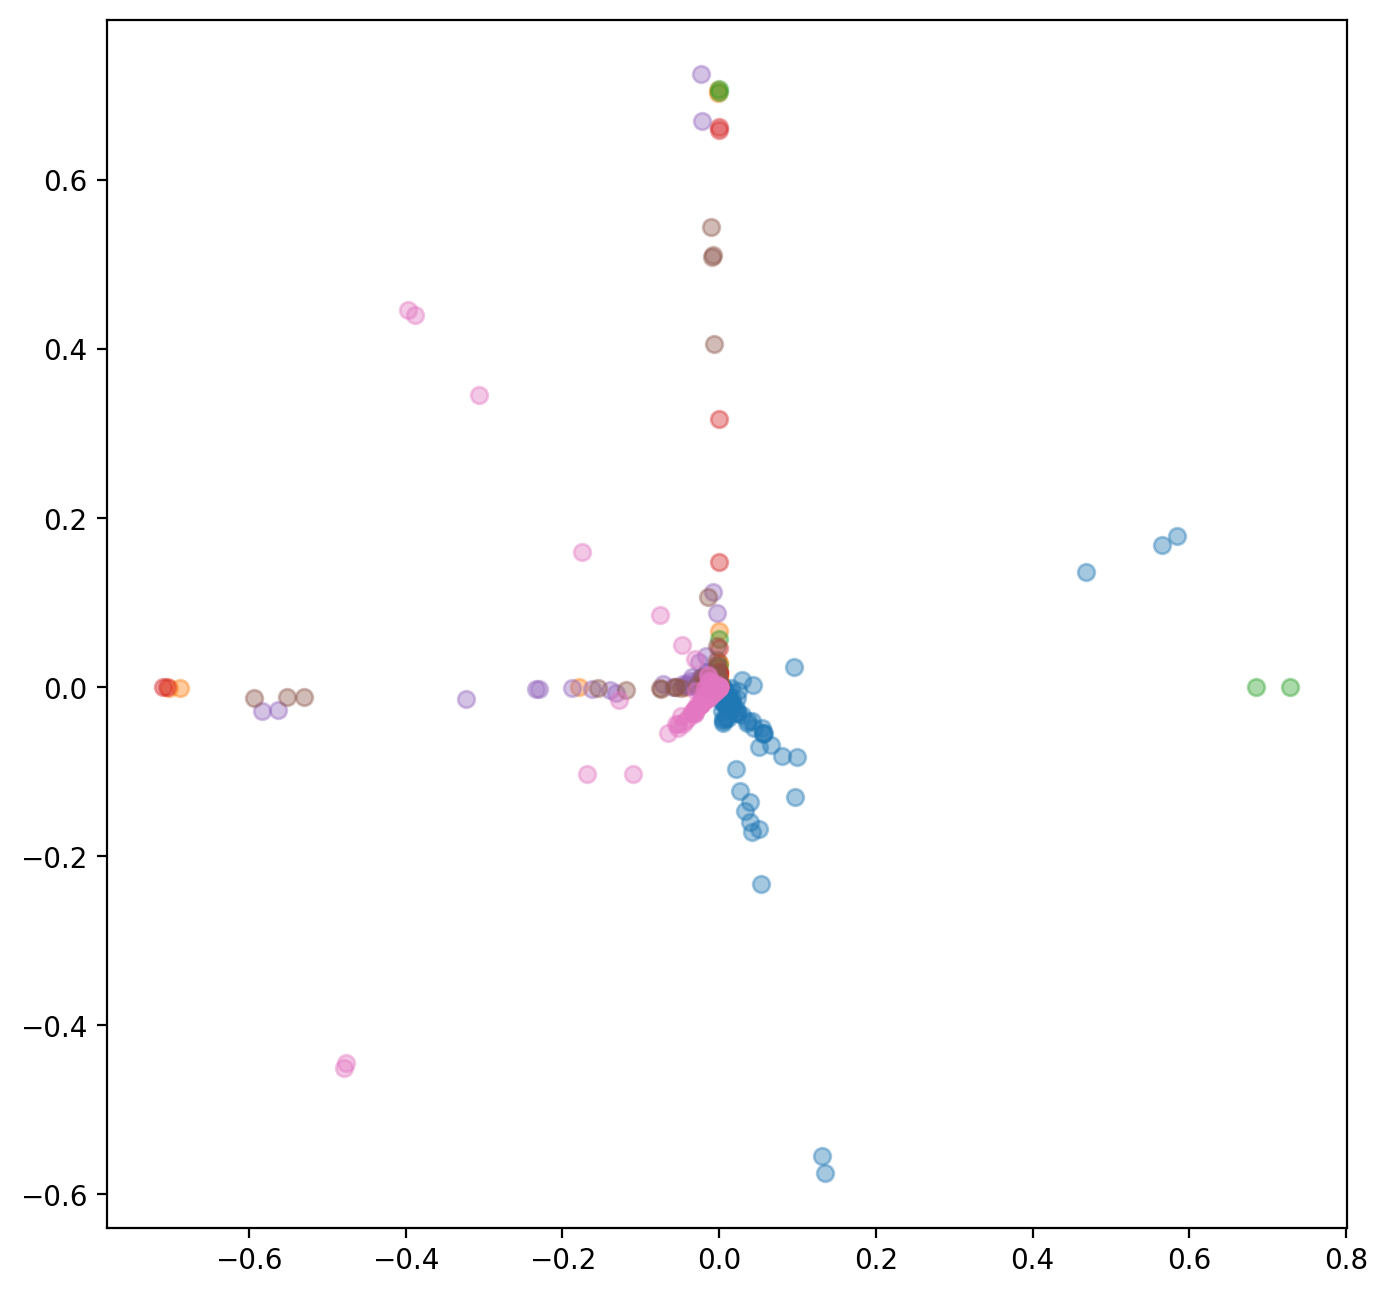

In [13]:


# uCols = []

# for A in res:
#     u, s, vh = np.linalg.svd(A)
#     plt.scatter(u[:, 0], u[:, 1], alpha=0.4)